<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_pointipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [ ]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [ ]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###pointplot

###pointplot 실습에 사용할 데이터
- tips
 - total_bill(float64) : 최종 금액
 - tip(float64) : 팁
 - sex(category) : 성별
 - smoker(category) : 흡연자/비흡연자
 - day(category) : 요일(Sun/Sat/Thur/Fri)
 - time(category) : 시간(Dinner/Lunch)
 - size(int64) : 인원(1~6)


####tips

In [ ]:
#데이터 로드하기
tips = sns.load_dataset('tips')

In [ ]:
#데이터 정보
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
#데이터 수치적 요약
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
#데이터 범주적 요약
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


####그래프 확인

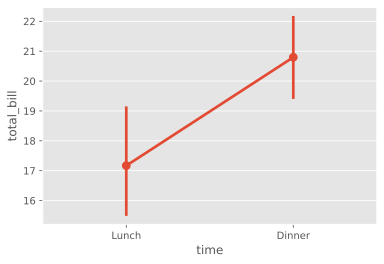

In [7]:
#x축 범주형, y축은 float
sns.pointplot(x='time', y='total_bill', data=tips)

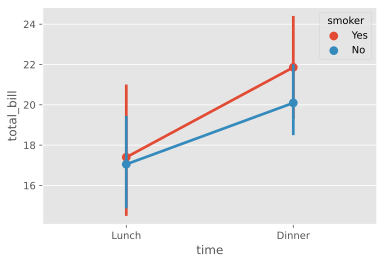

In [8]:
#hue옵션 사용
sns.pointplot(x='time',y='total_bill', hue='smoker', data=tips)


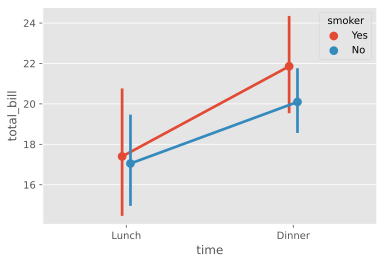

In [9]:
#dodge=True 옵션 사용
sns.pointplot(x='time',y='total_bill', hue='smoker',
              data=tips, dodge=True)

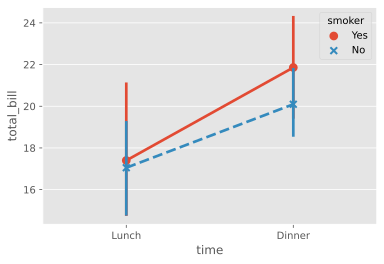

In [13]:
#markers, linestyle 옵션 사용
sns.pointplot(x='time', y='total_bill', hue='smoker',
              data=tips, markers=['o','x'],
              linestyles=['-','--'])

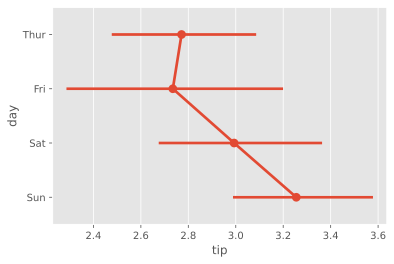

In [14]:
#x축에 float , y축 범주형
sns.pointplot(x='tip', y='day', data=tips)

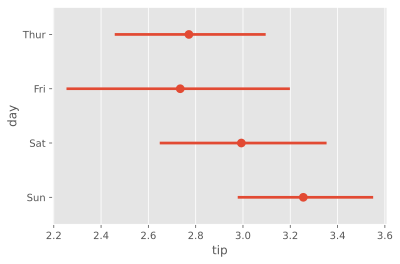

In [15]:
#join=False 옵션 사용
sns.pointplot(x='tip', y='day', data=tips, join=False)

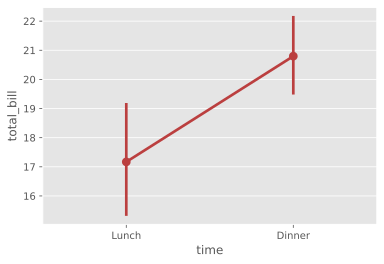

In [19]:
#color=#bb3f3f 옵션 사용
sns.pointplot(x='time', y='total_bill', data=tips, color='#bb3f3f')

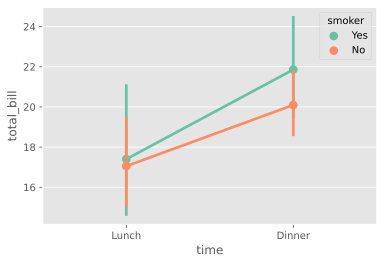

In [21]:
#palette = Set2 옵션 사용
sns.pointplot(x='time', y='total_bill', hue='smoker',
              data=tips, palette='Set2')

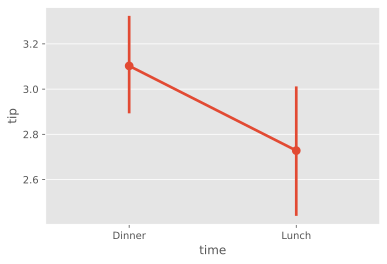

In [22]:
# order 옵션 사용, order 옵션에 할당한 순서 대로 표현
sns.pointplot(x='time', y='tip', data=tips, order=['Dinner', 'Lunch'])

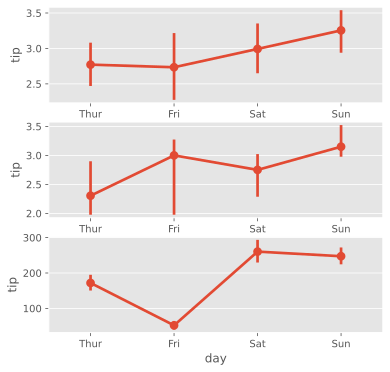

In [39]:
f, ax= plt.subplots(3,1,figsize=(6,6))
sns.pointplot(x='day',y='tip', data=tips, ax=ax[0])
#estimator 옵션 사용
from numpy import median, mean
sns.pointplot(x='day',y='tip', data=tips, estimator=median,ax=ax[1])

from numpy import sum
sns.pointplot(x='day',y='tip', data=tips, estimator=sum,ax=ax[2])

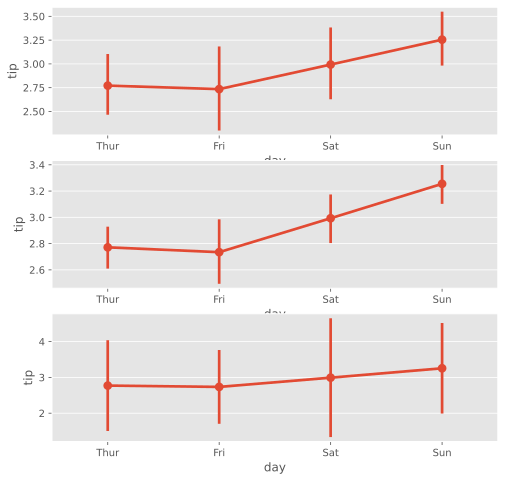

In [42]:
# ci 옵션 설정
f, ax = plt.subplots(3,1,figsize=(8,8))
sns.pointplot(x='day', y='tip', data=tips, ax=ax[0])
#오차 막대를 사용하여 평균의 오차를 표시
sns.pointplot(x='day', y='tip', data=tips, ax=ax[1], ci=68)
#신뢰 구간 대신 관측치의 표준 편차 표시
sns.pointplot(x='day', y='tip', data=tips, ax=ax[2], ci='sd')

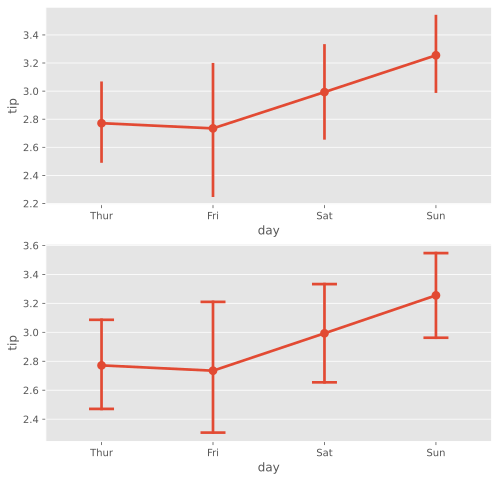

In [43]:
#capsize=.2 옵션 사용

#오차 막대에 caps 추가
f, ax= plt.subplots(2,1,figsize=(8,8))
sns.pointplot(x='day', y='tip', data=tips, ax=ax[0])
sns.pointplot(x='day', y='tip', data=tips, ax=ax[1], capsize=.2)

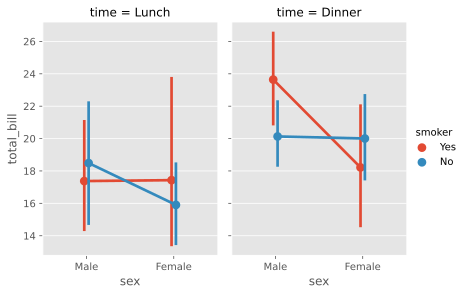

In [45]:
#catplot으로 pointplot 그리기
sns.catplot(kind='point', x='sex', y='total_bill', hue='smoker',
            col='time', data=tips,dodge=True, height=4, aspect=.7)